1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


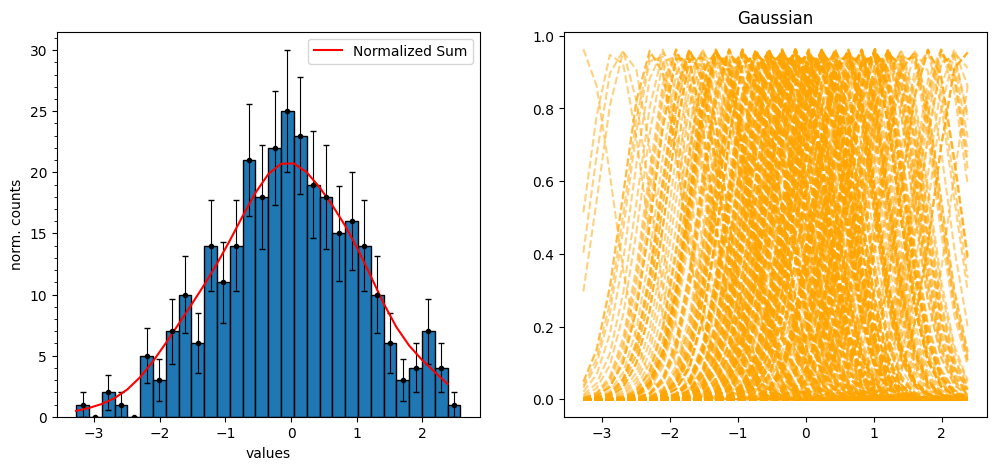

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.stats import norm
from scipy.integrate import trapz

std=1.06
x = np.random.normal(0, std, 300)
#counts, bins = np.histogram(x,50,density=True)
fig, axs = plt.subplots(1,2, figsize=(12,5))
n, bins, patches = axs[0].hist(x, 30, density=False, edgecolor='k')
axs[0].yaxis.set_major_locator(MultipleLocator(5))
axs[0].yaxis.set_minor_locator(MultipleLocator(1))
bincenters=0.5*(bins[1:]+bins[:-1])
axs[0].errorbar(bincenters, n, yerr=(np.sqrt(n)), elinewidth=0.8, color='black', marker = '.',
    drawstyle = 'steps-mid', linestyle = '', capsize=2)
axs[0].set_xlabel('values')
axs[0].set_ylabel('norm. counts')
#ax.yaxis.grid(True, which='major')
# Create an array to store the sum of Gaussian functions
gaussian_sum = np.zeros(len(bins)-1)
# Plot individual Gaussian functions
for value in x:
    # Create a Gaussian with mean corresponding to the element value
    # and std as the default or a user-specified value
    gaussian = norm.pdf(bins[:-1], loc=value, scale=std_default)
    axs[1].plot(bins[:-1], gaussian, '--', alpha=0.5, color='orange')

    # Add the Gaussian to the sum
    gaussian_sum += gaussian

plt.title('Gaussian')
area_original_hist = trapz(n, x=bins[:-1])
area_gaussian_sum = trapz(gaussian_sum, x=bins[:-1])
gaussian_sum_normalized = gaussian_sum * (area_original_hist / area_gaussian_sum)

# Plot the normalized sum
axs[0].plot(bins[:-1], gaussian_sum_normalized, label='Normalized Sum', color='red')
axs[0].legend()

plt.show()



2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


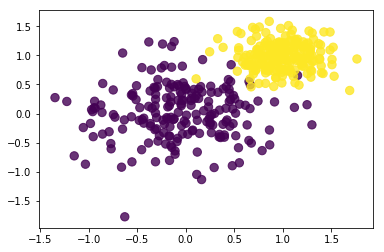

In [2]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

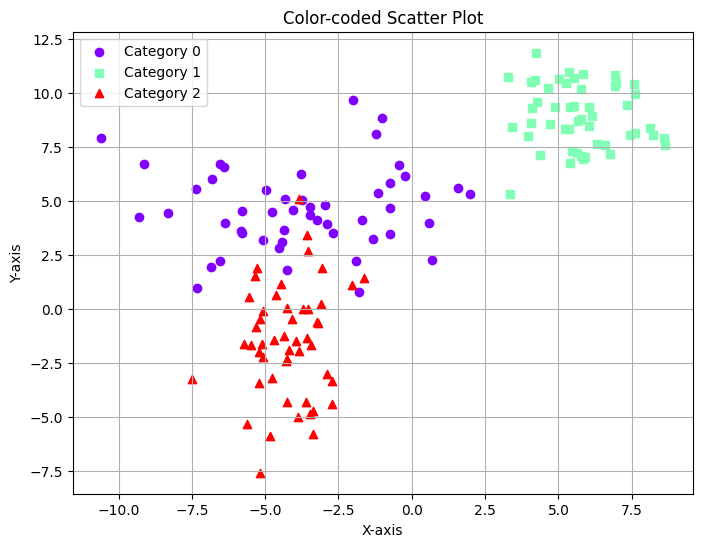

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def generate_2d_gaussian(mean, std, size):
    return np.random.normal(mean, std, size)

def generate_dataset(num_categories, num_points_per_category):
    dataset = []
    labels = []
    
    for category in range(num_categories):
        mean = np.random.uniform(-10, 10, 2)  # Random mean for each category
        std = np.random.uniform(1, 3, 2)      # Random standard deviation for each category
        category_data = generate_2d_gaussian(mean, std, (num_points_per_category, 2))
        
        dataset.append(category_data)
        labels.extend([category] * num_points_per_category)

    return np.vstack(dataset), np.array(labels)

def plot_scatter(dataset, labels):
    categories = np.unique(labels)
    markers = ['o', 's', '^', 'D', 'v', 'p', 'h', '8']  # Extend if more categories are needed
    colors = plt.cm.rainbow(np.linspace(0, 1, len(categories)))

    plt.figure(figsize=(8, 6))

    for category, marker, color in zip(categories, markers[:len(categories)], colors):
        category_indices = labels == category
        plt.scatter(dataset[category_indices, 0], dataset[category_indices, 1], 
                    marker=marker, color=color, label=f'Category {category}')

    plt.title('Color-coded Scatter Plot')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example with 2 categories and 50 points per category
num_categories = 3
num_points_per_category = 50

dataset, labels = generate_dataset(num_categories, num_points_per_category)
plot_scatter(dataset, labels)


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

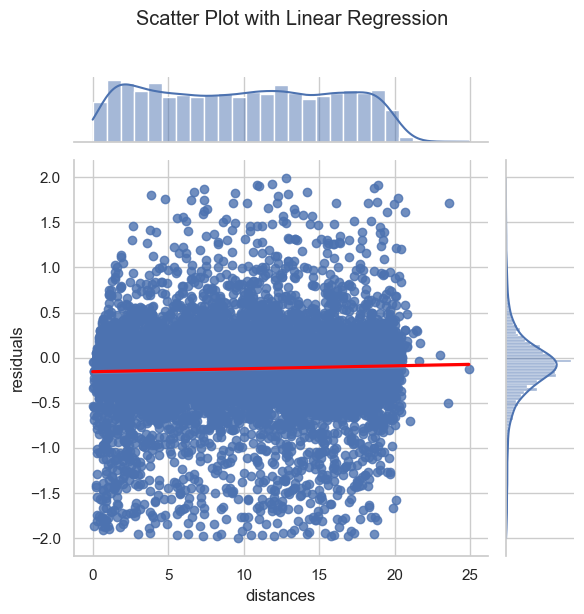

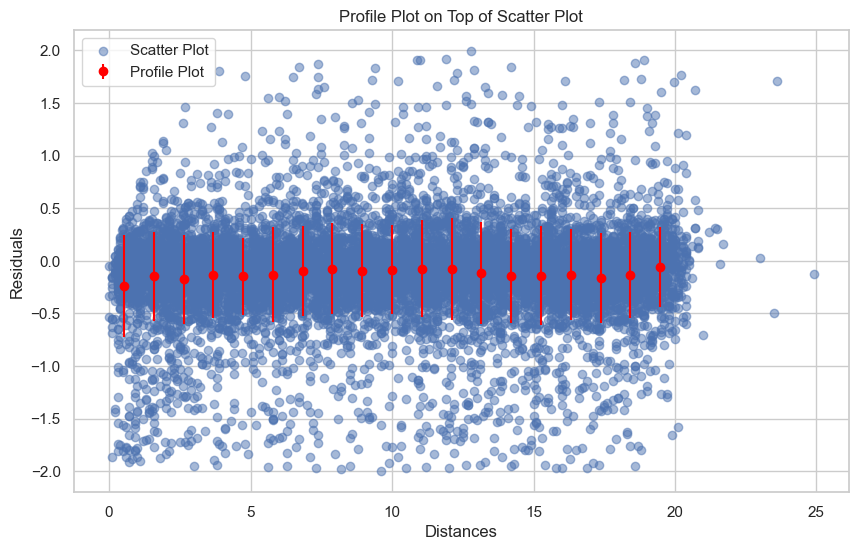

In [60]:
import seaborn as sns
from scipy.stats import linregress
import pandas as pd

# Load the dataset
data = np.load("residuals_261.npy", allow_pickle=True).item()
df = pd.DataFrame(data)
df_cleaned = df[np.abs(df['residuals']) < 2]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_cleaned['distances'], df_cleaned['residuals'])

# Plot seaborn jointplot with linear regression
sns.set(style="whitegrid")
joint_plot = sns.jointplot(x='distances', y='residuals', data=df_cleaned, kind='reg', line_kws={'color':'red'})
plt.suptitle('Scatter Plot with Linear Regression', y=1.02)  # Title above the plot
plt.tight_layout()  # Add this line
plt.show()
bins = np.linspace(0, 20, 20)  # Adjust the number of bins as needed

# Compute mean and standard deviation of "residuals" in each bin
x = (bins[:-1] + bins[1:]) / 2  # Bin centers
y = []
erry = []

for i in range(len(bins)-1):
    bin_mask = (df_cleaned['distances'] >= bins[i]) & (df_cleaned['distances'] < bins[i+1])
    residuals_in_bin = df_cleaned.loc[bin_mask, 'residuals']
    y.append(residuals_in_bin.mean())
    erry.append(residuals_in_bin.std())

# Convert to numpy arrays
y = np.array(y)
erry = np.array(erry)

# Plot the profile plot on top of the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['distances'], df_cleaned['residuals'], alpha=0.5, label='Scatter Plot')
plt.errorbar(x, y, yerr=erry, fmt='o', color='red', label='Profile Plot')
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.title('Profile Plot on Top of Scatter Plot')
plt.legend()
plt.show()